# Examples of scanpy visualizations

This notebook gives an example of some of the visualization methods available in scanpy.

In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import rcParams
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity=2
sc.logging.print_versions()

scanpy==1.4+81.g4f690e5.dirty anndata==0.6.18 numpy==1.15.4 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

Data was obtained from 10x PBMC 68k dataset (https://support.10xgenomics.com/single-cell-gene-expression/datasets). The dataset was filtered and a sample of 700 cells and 765 highly variable genes was kept.

For this data, PCA and UMAP are already computed. Also, louvain clustering and cell cycle detection are present in `pbmc.obs`

In [4]:
pbmc = sc.datasets.pbmc68k_reduced()

In [5]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

To modify the default figure size use rcParams

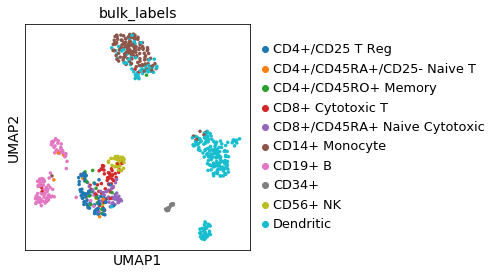

In [6]:
rcParams['figure.figsize'] = 4,4
sc.pl.umap(pbmc, color=['bulk_labels'], s=50)

## define list of marker genes from literature

In [7]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ',  'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',  
                'FCGR3A', 'FCER1A', 'CST3']

## plot marker genes per cluster using stacked violin plots

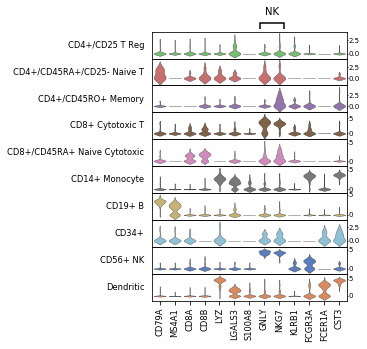

In [8]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels',
                         var_group_positions=[(7, 8)], var_group_labels=['NK'])

### same as before but swapping the axes and with dendrogram (notice that the categories are reordered)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_bulk_labels']`
categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: NK


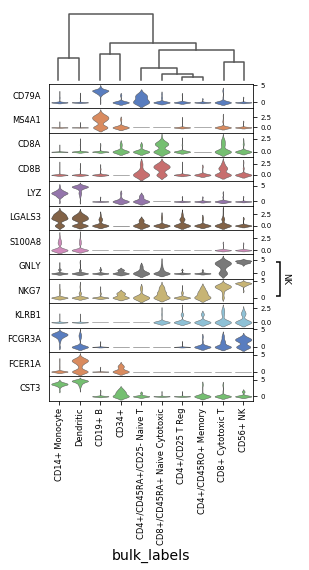

In [9]:
ax = sc.pl.stacked_violin(pbmc, marker_genes, groupby='bulk_labels', swap_axes=True, 
                         var_group_positions=[(7, 8)], var_group_labels=['NK'], dendrogram=True)

## visualize gene expression using dotplot

The dotplot visualization provides a compact way of showing per group, the fraction of cells expressing a gene (dot size) and the mean expression of the gene in those cell (color scale). 

The use of the dotplot is only meaningful when the counts matrix contains zeros representing no gene counts. dotplot visualization does not work for scaled or corrected matrices in which cero counts had been replaced by other values.

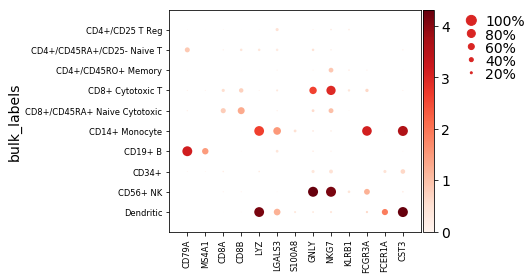

In [10]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='bulk_labels')

To show some of the options of dot plot, here we add:

* dendrogram=True show dendrogram and reorder group by categories based on dendrogram order
* dot_max=0.5  plot largest dot as 50% or more cells expressing the gene
* dot_min=0.3  plot smallest dot as 30% or less cells expressing the gene
* standard_scale='var' normalize the mean gene expression values between 0 and 1



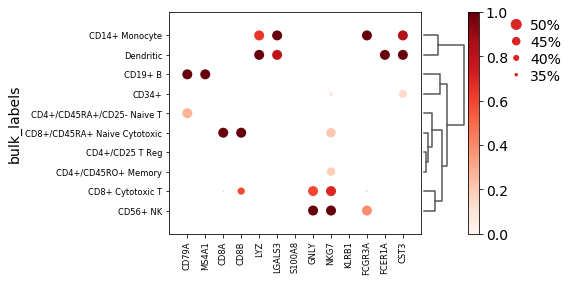

In [11]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True, dot_max=0.5, dot_min=0.3, standard_scale='var')

In the next plot we added:

* smallest_dot=40 To increase the size of the smallest dot
* color_map='Blues' To change the colormap palette
* figsize=(8,5) To change the default figure size



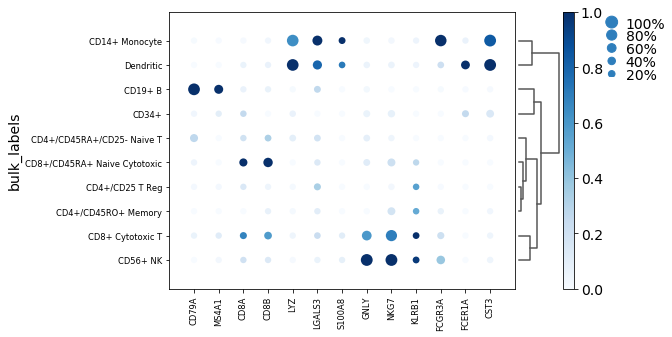

In [12]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True, 
                   standard_scale='var', smallest_dot=40, color_map='Blues', figsize=(8,5))

Here we add grouping labels for genes using var_group_positions and var_group_labels

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`
categories: 0, 1, 2, etc.
var_group_labels: B cells, dendritic


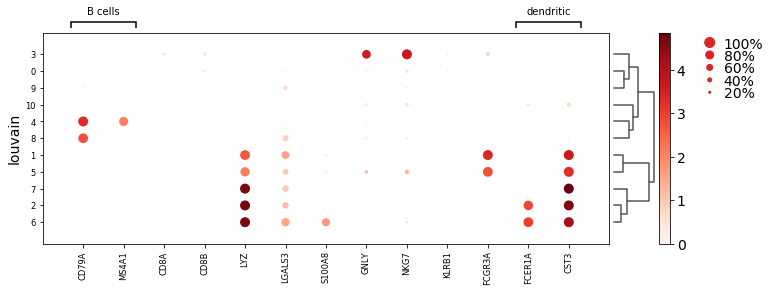

In [13]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='louvain', 
              var_group_positions=[(0,1), (11, 12)], 
              var_group_labels=['B cells', 'dendritic'], 
              figsize=(12,4), var_group_rotation=0, dendrogram='dendrogram_louvain')

## visualize gene expression using matrixplot

The matrixplot shows the mean expression of a gene in a group by category as a heatmap. In contrast to dotplot, the matrix plot can be used with corrected and/or scaled counts. By default raw counts are used.

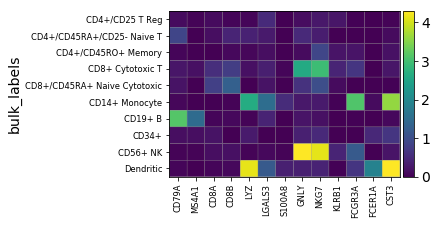

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[4.16, 0, 0.2])

In [14]:
sc.pl.matrixplot(pbmc, marker_genes, groupby='bulk_labels')

Next we add a dendrogram and scale the gene expression values between 0 and 1 using `standar_scale=var`

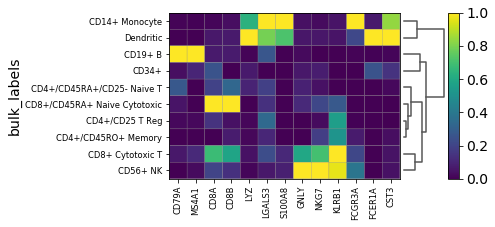

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[4.16, 0.8, 0.2])

In [15]:
sc.pl.matrixplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True, standard_scale='var')

In [16]:
# to use the 'non-raw' data we select marker genes present in this data.
marker_genes_2 = [x for x in marker_genes if x in pbmc.var_names]

In the next figure we use:
* use_raw=False to use the scaled values (after `sc.pp.scale`) stored in pbmc.X
* vmin=-3, vmax=3, cmap='bwr' to select the max and min for the diverging color map 'bwr'
* swap_axes=True to show genes in rows
* figsize=(5,6) to modify the defult figure size

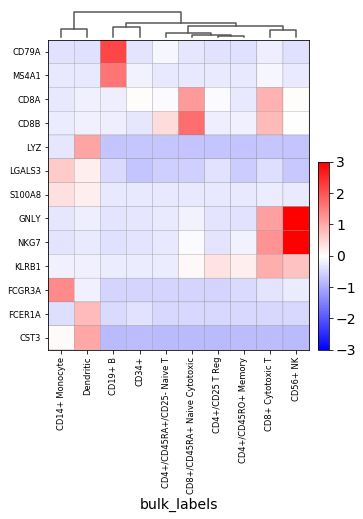

In [17]:
ax = sc.pl.matrixplot(pbmc, marker_genes_2, groupby='bulk_labels', dendrogram=True, 
                      use_raw=False, vmin=-3, vmax=3, cmap='bwr',  swap_axes=True, figsize=(5,6))

## visualize gene expression using heatmap

Heatmaps do not collapse cells as in previous plots. Instead, each cells is shown in a row (or columm if `swap_axes=True`). The groupby information can be added and is shown using the same color code found for `sc.pl.umap` or any other scatter plot.

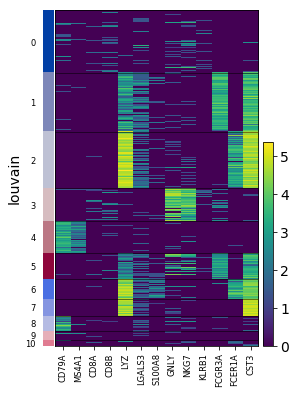

In [18]:
ax = sc.pl.heatmap(pbmc,marker_genes, groupby='louvain')

same as before but using `use_raw=False` to use the scaled data stored in `pbmc.X`. Some genes are highlighted using `var_groups_positions` and `var_group_labels` and the figure size is adjusted

categories: 0, 1, 2, etc.
var_group_labels: B cells, dendritic


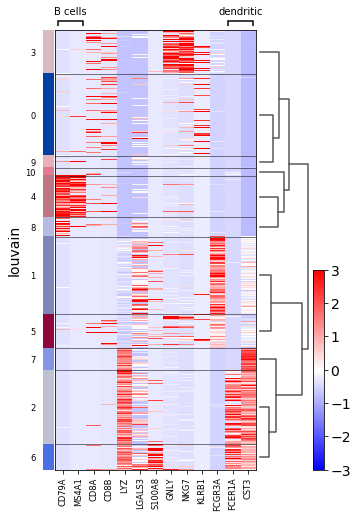

In [19]:
ax = sc.pl.heatmap(pbmc, marker_genes, groupby='louvain', figsize=(5, 8), 
              var_group_positions=[(0,1), (11, 12)], use_raw=False, vmin=-3, vmax=3, cmap='bwr', 
              var_group_labels=['B cells', 'dendritic'], var_group_rotation=0, dendrogram='dendrogram_louvain')

## visualize gene expression using tracksplot

The track plot shows the same information as the heatmap, but, instead of a color scale, the gene expression is represented by height.

In [20]:
# Track plot data is better visualized using the non-log counts
import numpy as np
ad = pbmc.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

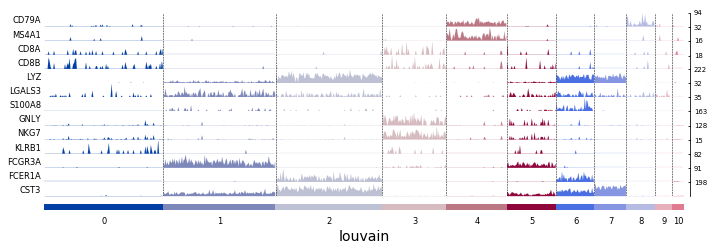

In [21]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='louvain')

# visualization of marker genes

Gene markers are computed using the *bulk_labels* categories and the *logreg* method

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(pbmc, groupby='bulk_labels', method='logreg')

ranking genes
    finished (0:00:00.37)


## visualize marker genes using panels

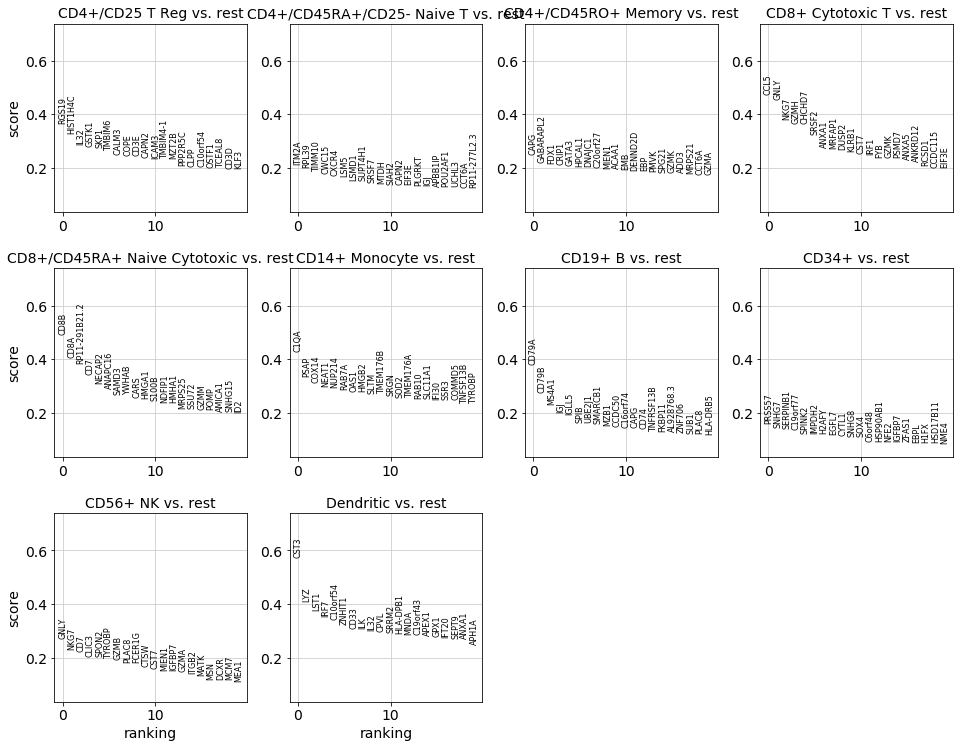

In [23]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(pbmc)

## Visualize marker genes using dotplot 

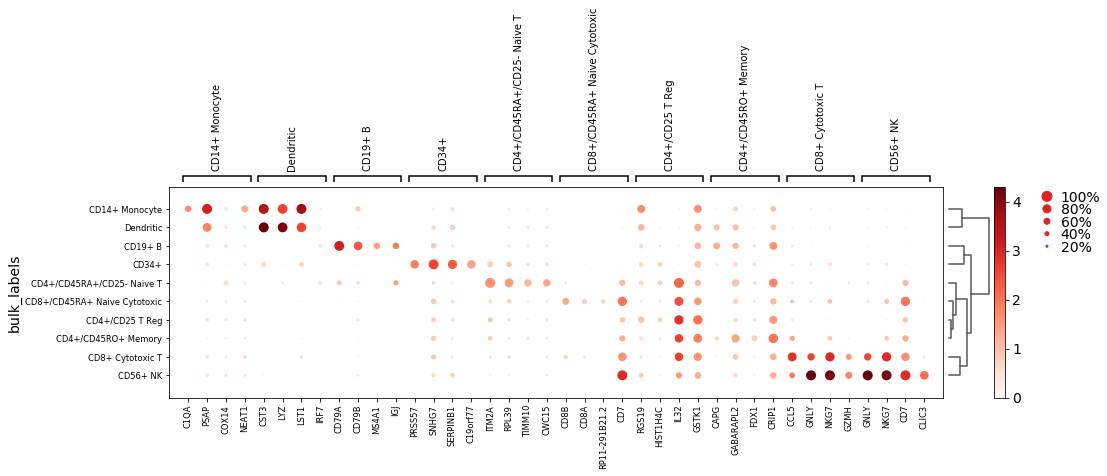

In [24]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

**Dotplot focusing only on two groups (the groups option is also available for violin, heatmap and matrix plots)**

categories: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.
var_group_labels: Dendritic, CD19+ B


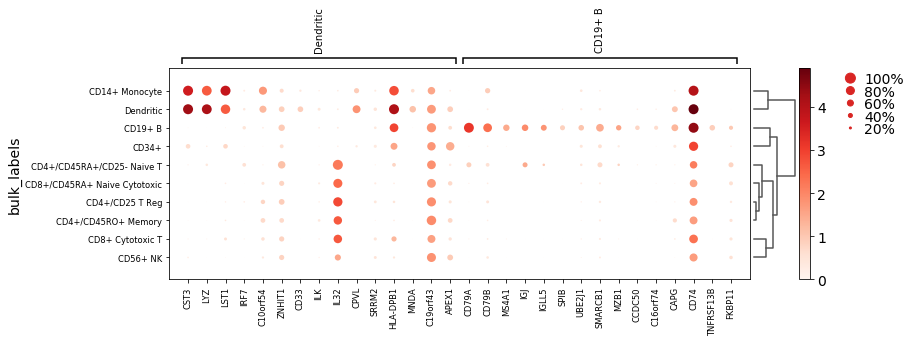

In [25]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=15, groups=['Dendritic', 'CD19+ B'])

**Dotplot showing the marker genes but with respect to 'louvain' clusters (in contrast to using the bulk_labels categories as before)**

categories: 0, 1, 2, etc.
var_group_labels: CD4+/CD25 T Reg, CD4+/CD45RA+/CD25- Naive T, CD4+/CD45RO+ Memory, etc.


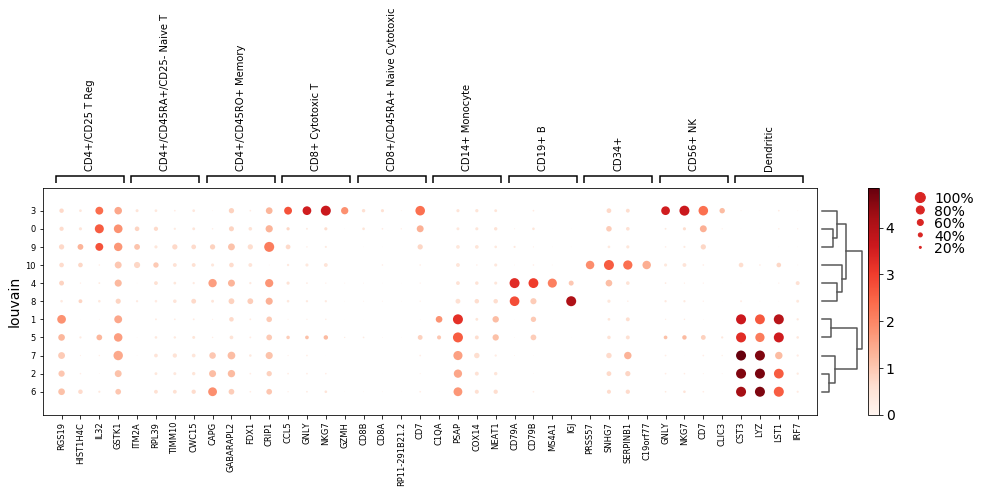

In [26]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, groupby='louvain', n_genes=4, dendrogram='dendrogram_louvain')

## Visualize marker genes using matrixplot 

For the following plot the raw gene expression is scaled and the color map is changed from the default to 'Blues'

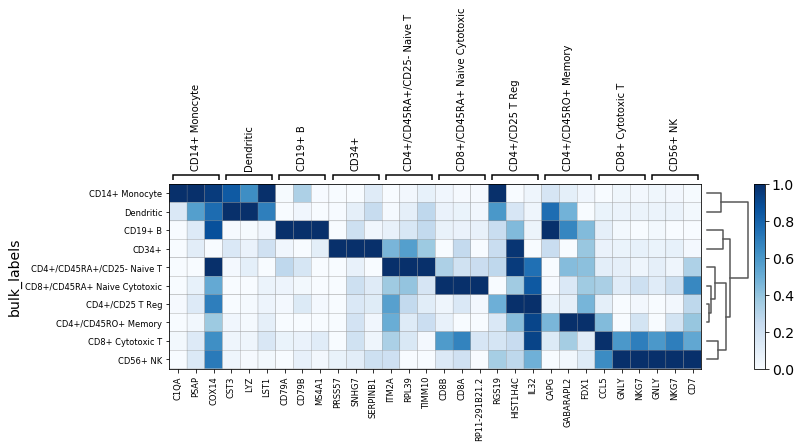

In [27]:
axs = sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, standard_scale='var', cmap='Blues')

Same as before but using the scaled data and setting a divergent color map

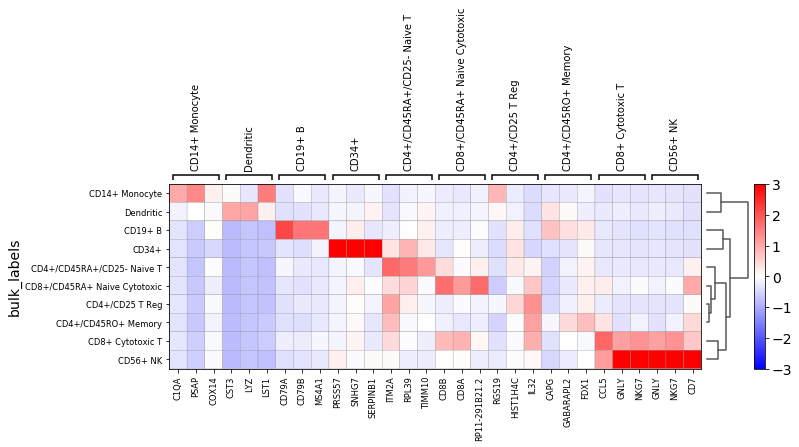

In [28]:
axs = sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr')

## Visualize marker genes using stacked violing plots

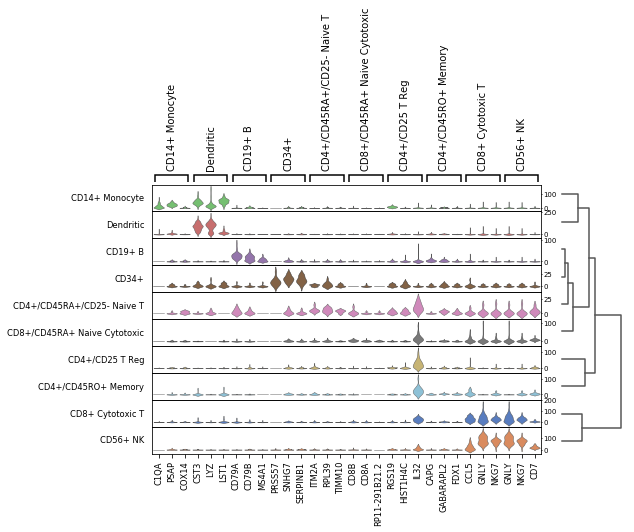

In [29]:
# instead of pbmc we use the 'ad' object (created earlier) in which the raw matrix is exp(pbmc.raw.matrix). This
# highlights better the differences between the markers.
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3)

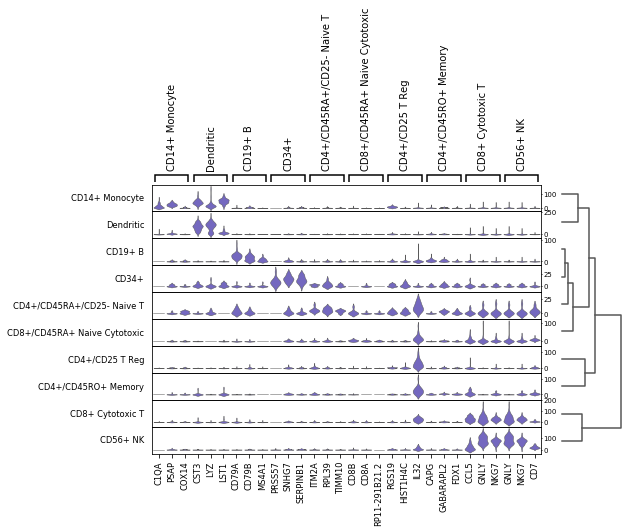

In [30]:
# setting row_palette='slateblue' makes all violin plots of the same color
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3, row_palette='slateblue')

**Same as previous but with axes swapped**

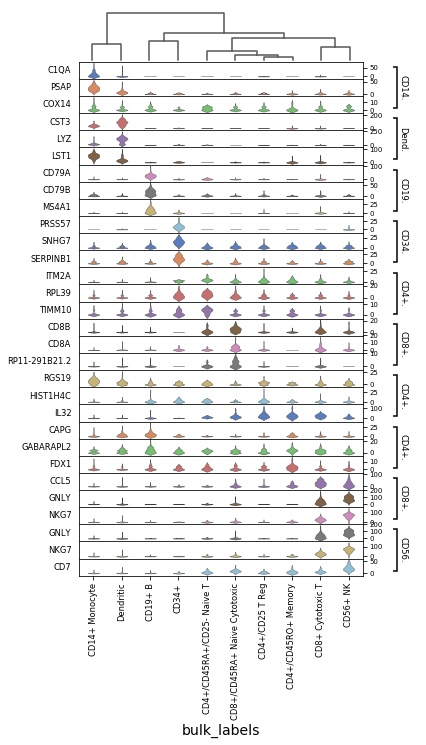

In [31]:
# width is used to set the violin plot width. Here, after setting figsize wider than default,
# the `width` arguments helps to keep the violin plots thin.
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3, swap_axes=True, figsize=(6, 10), width=0.4)

## visualize marker genes using heatmap

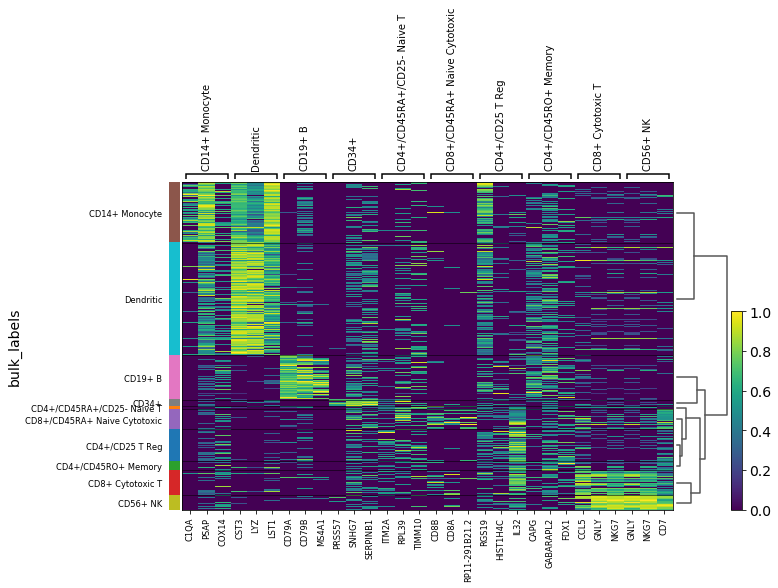

In [32]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, standard_scale='var')

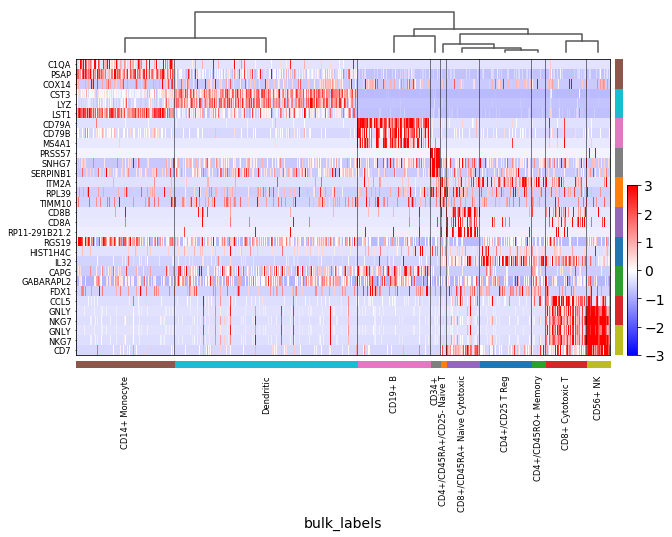

In [33]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr')

Showing 10 genes per category, turning the gene labels off and swapping the axes. Notice that when the image is swaped, a color code for the categories appear instead of the 'brackets'.

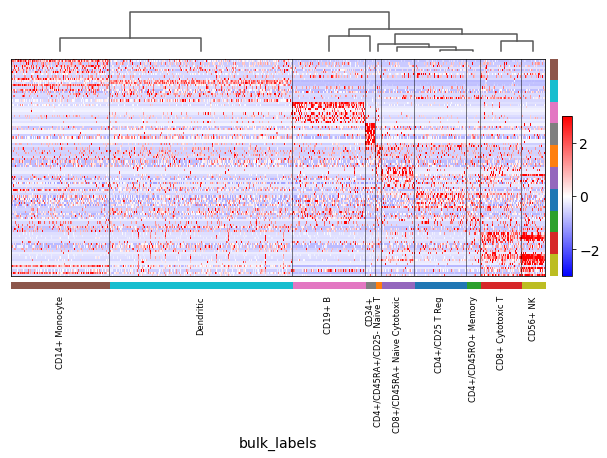

In [35]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

### Visualize marker genes using tracksplot

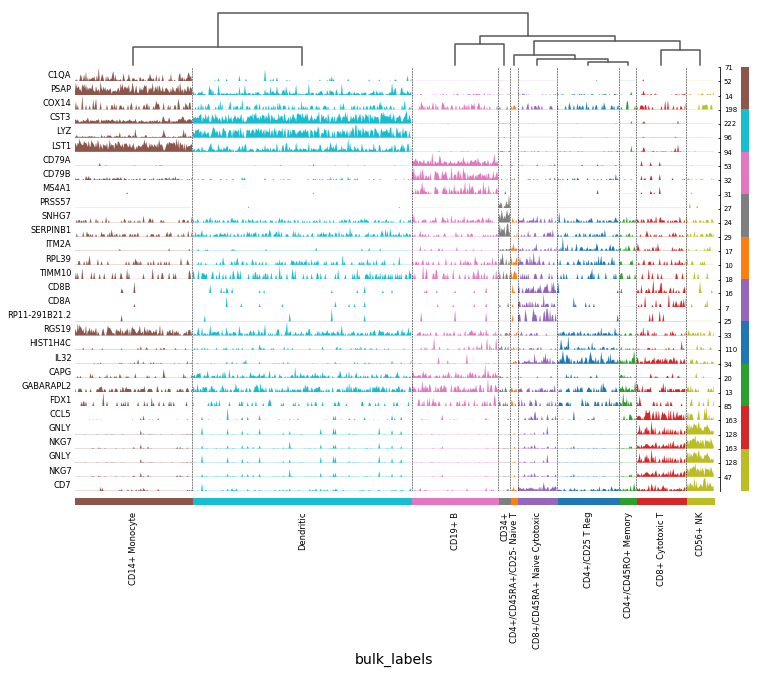

In [36]:
sc.pl.rank_genes_groups_tracksplot(ad, n_genes=3)

## filtering of marker genes
The tools `sc.tl.filter_rank_genes_groups` can be used to select markers that fulfill certain criteria, for example whose fold change is at least 2 with respect to other categories and that are expresssed on 50% of the category cells.

In [37]:
# define a new category called 'broad_type' which collapses all T-cells into one group
t_cell = ['CD4+/CD25 T Reg', 'CD4+/CD45RA+/CD25- Naive T', 'CD4+/CD45RO+ Memory','CD8+ Cytotoxic T', 'CD8+/CD45RA+ Naive Cytotoxic']
pbmc.obs['broad_type'] = pd.Categorical(pbmc.obs.bulk_labels.apply(lambda x: x if x not in t_cell  else 'T-cell'))

In [38]:
# find gene markers in the 'broad_type' group. 
sc.tl.rank_genes_groups(pbmc, 'broad_type', method='wilcoxon', n_genes=200)

ranking genes
    finished (0:00:00.08)


In [39]:
sc.tl.filter_rank_genes_groups(pbmc)

Filtering genes using: min_in_group_fraction: 0.25 min_fold_change: 2, max_out_group_fraction: 0.5


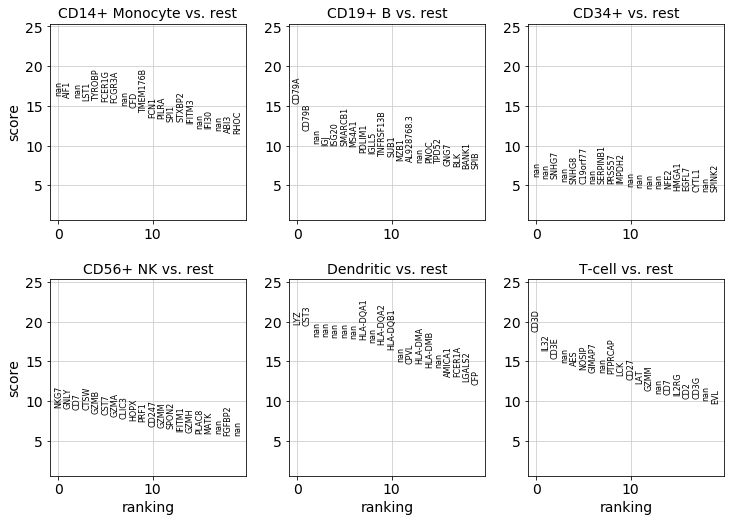

In [40]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(pbmc, key='rank_genes_groups_filtered', ncols=3)

all filtered genes are set to `nan`

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_broad_type']`


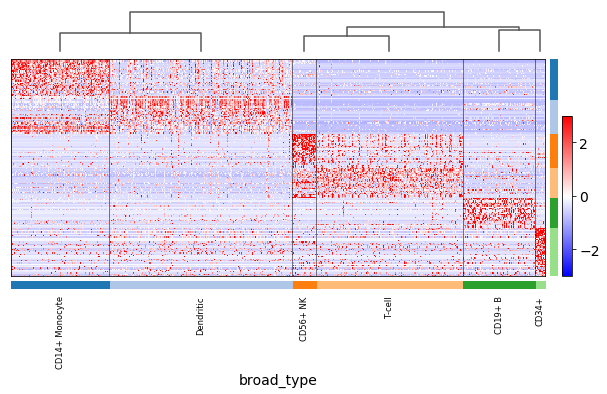

In [41]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=200, key='rank_genes_groups_filtered', 
                                swap_axes=True, use_raw=False, vmax=3, vmin=-3, cmap='bwr', dendrogram=True)

**Notice** that `n_genes=200` is set, but only the maximum number of filtered genes found is actually plotted. For example, for CD34+ only few genes are shown

### Apply more stringent marker gene filters

In [42]:
sc.tl.filter_rank_genes_groups(pbmc, 
                               min_in_group_fraction=0.5, 
                               max_out_group_fraction=0.3, 
                               min_fold_change=1.5)

Filtering genes using: min_in_group_fraction: 0.5 min_fold_change: 1.5, max_out_group_fraction: 0.3


### Without filtering

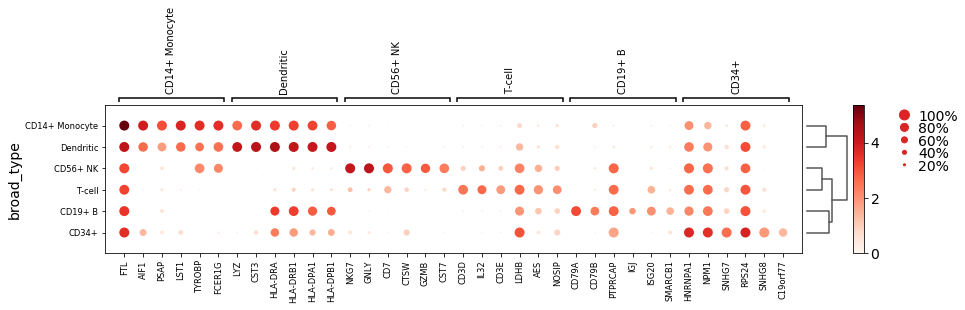

In [43]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=6)

### With filtering

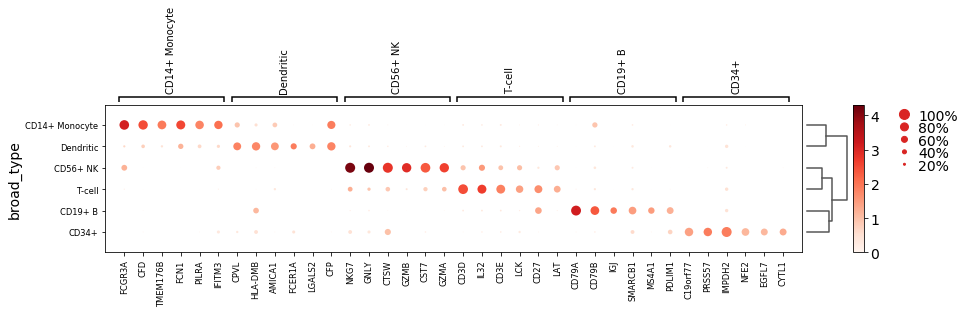

In [44]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=6, key='rank_genes_groups_filtered')

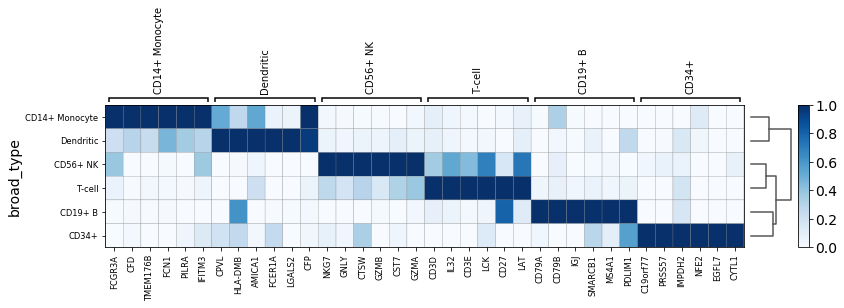

In [45]:
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=6, key='rank_genes_groups_filtered', standard_scale='var', cmap='Blues')

In [46]:
# Track plot data and violin is better visualized using the non-log counts
ad = pbmc.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

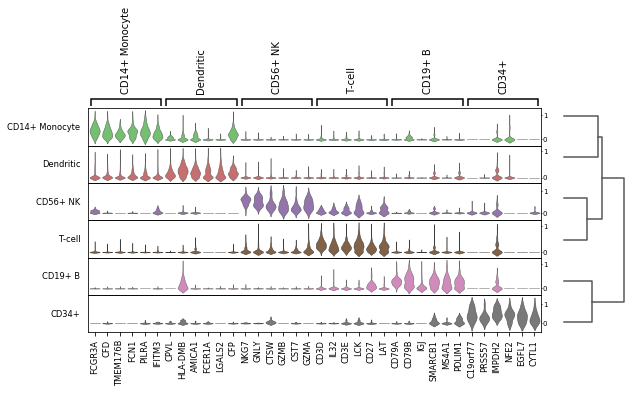

In [47]:
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=6, key='rank_genes_groups_filtered', standard_scale='var')
                                

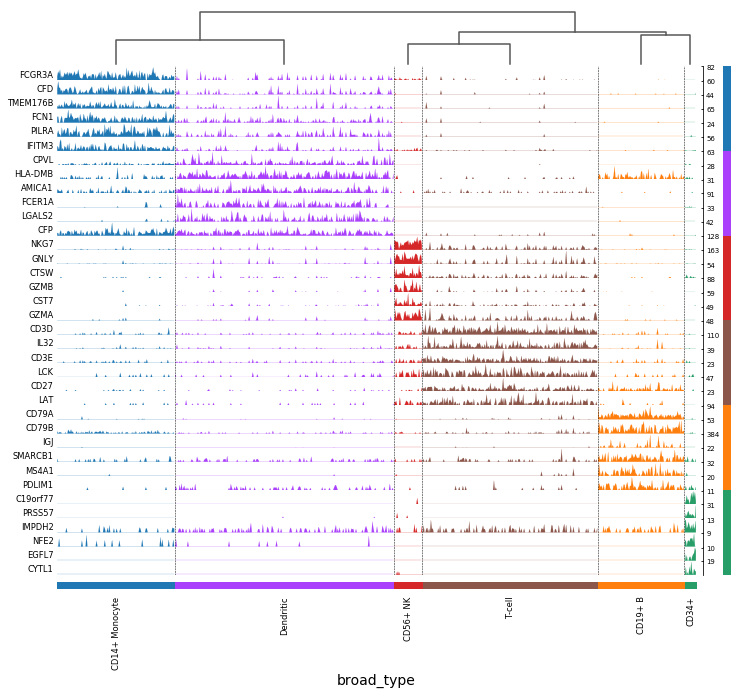

In [48]:
sc.pl.rank_genes_groups_tracksplot(ad, n_genes=6, key='rank_genes_groups_filtered')
                                

## compare CD4+/CD25 T Reg markers vs. rest using violin

In [49]:
pbmc.obs.bulk_labels.cat.categories[0]

'CD4+/CD25 T Reg'

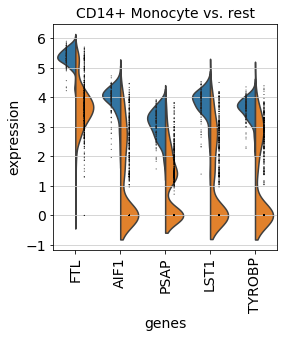

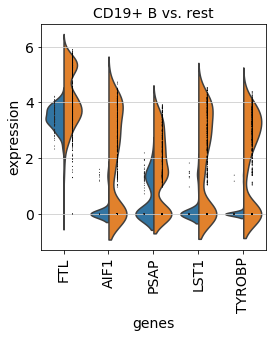

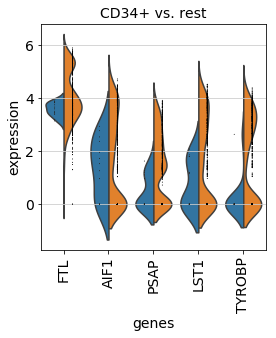

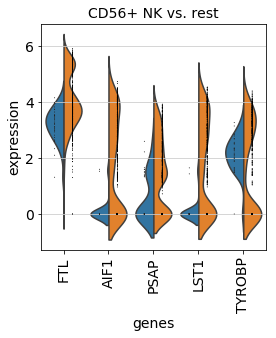

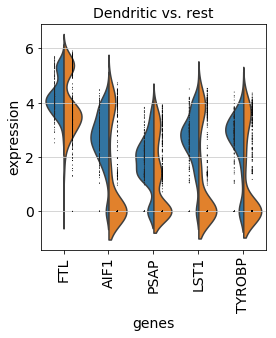

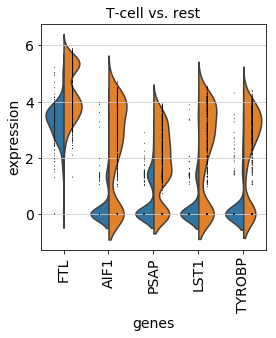

In [50]:
sc.pl.rank_genes_groups_violin(pbmc,  n_genes=5, jitter=False)

# Dendrogram options

Hierarchical clusterings for categorical observations can also be visualized independently using `sc.pl.dendrogram`

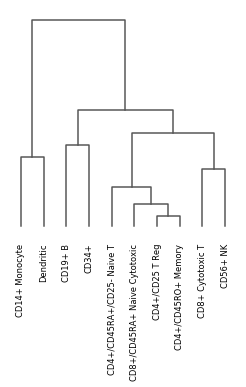

In [51]:
sc.pl.dendrogram(pbmc, 'bulk_labels')

The previous image uses a dendrogram that was already computed. 

We can re-run the dendrogram function to use other parameters

In [52]:
# compute hiearchical clustering based on the 
# given `var_names` from the raw matrix
sc.tl.dendrogram(pbmc, 'bulk_labels', var_names=marker_genes, use_raw=True)

Storing dendrogram info using `.uns['dendrogram_bulk_labels']`


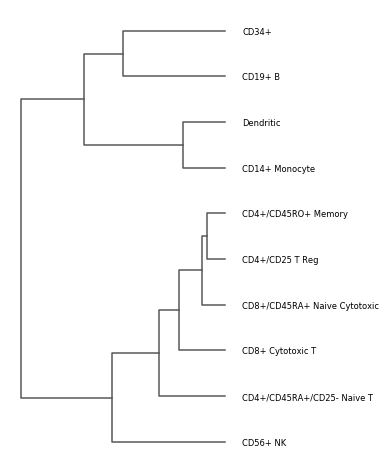

In [53]:
rcParams['figure.figsize'] = 4,8
sc.pl.dendrogram(pbmc, 'bulk_labels', orientation='left')

## Plot correlation

Together with the dendrogram it is possible to plot the correlation (by default 'pearson') of the categories.

In [54]:
# compute hiearchical clustering based on the 
# given `var_names` from the raw matrix
sc.tl.dendrogram(pbmc, 'bulk_labels', n_pcs=30)

    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_bulk_labels']`


(0.0, 10.0)


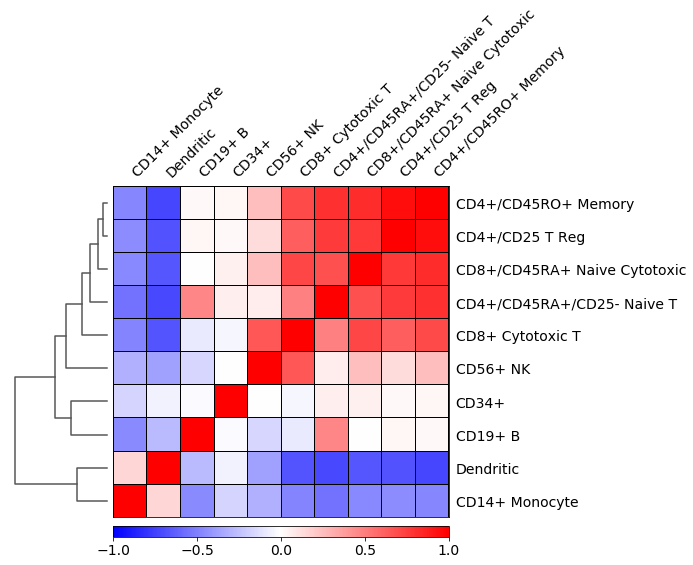

In [55]:
ax= sc.pl.correlation_matrix(pbmc, 'bulk_labels')